# This notebook will be used to run the ML algorithms.

First let us import the necessary libraries.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we have to merge the 2 datasets vertically after the column names have been added.

In [46]:
# create a list containing the column names
column_names= ["age","workclass","fnlwgt","education","education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income"]

# convert the .txt files to .csv
train = pd.read_csv('dataset/adult_data.txt', sep=",\s", header=None, names=column_names, engine='python') 
test = pd.read_csv('dataset/adult_test.txt', sep=",\s", header=None, names=column_names, engine='python')
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')

# merge the 2 data frames vertically
df = pd.concat([test,train])
df.reset_index(inplace=True, drop=True) # the index is reset
df

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\arkha\AppData\Local\Temp\ipykernel_22892\1007561092.py:5: SyntaxWarning: invalid escape sequence '\s'
  train = pd.read_csv('dataset/adult_data.txt', sep=",\s", header=None, names=column_names, engine='python')
C:\Users\arkha\AppData\Local\Temp\ipykernel_22892\1007561092.py:6: SyntaxWarning: invalid escape sequence '\s'
  test = pd.read_csv('dataset/adult_test.txt', sep=",\s", header=None, names=column_names, engine='python')


C:\Users\arkha\AppData\Local\Temp\ipykernel_22892\1007561092.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48839,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48840,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48841,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


We can see that the 0th row has irrelevant values.

In [47]:
df = df.drop(index=0)
df = df.reset_index(drop=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


### Data Preprocessing

Let us check the dataset for null values.

In [48]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Upon careful observation, it could be seen that though the code provides that there are no null values, some of the values in the columns with data type have been filled with just "?".

In [49]:
df[df == '?'] = np.nan # dropping the rows with "?"
df = df.dropna(axis=0)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


The classification problem requires us to predict whether the income exceeds $50,000 per year. So if the income value is '<=50K', then the value is replaced with 0, else if the income value is '>50K', then the value is replaced with 1.

In [50]:
# the values are replaced with the respective new values in the income column
df['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
df

C:\Users\arkha\AppData\Local\Temp\ipykernel_22892\2647791319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
C:\Users\arkha\AppData\Local\Temp\ipykernel_22892\2647791319.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'].rep

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


### Feature Selection
Now we have to check which features of the dataset exactly contribute to the prediction.

It could be noted that the column "education.num" could prove to be useless in this particular classification problem as it is redunadant with the "education" column. So this column could be dropped.

In [51]:
df = df.drop('education.num', axis=1) # the column is dropped
df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,89814.0,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,336951.0,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,160323.0,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34,Private,198693.0,10th,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
48838,40,Private,154374.0,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
48839,58,Private,151910.0,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
48840,22,Private,201490.0,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


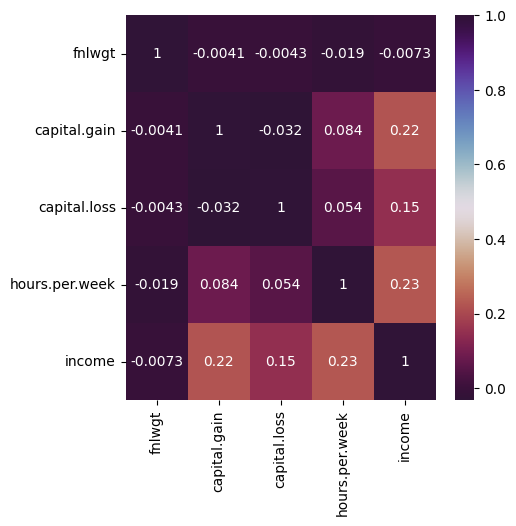

In [52]:
numeric_df = df.select_dtypes(include='number') # only the numeric columns have to be selected
corrmat = numeric_df.corr() # the correlation matrix is calculated
plt.figure(figsize=(5,5)) # the size of the figure is specified
sns.heatmap(corrmat, annot=True, cmap='twilight_shifted_r') # the heatmap is plotted
plt.show()

Correlation is used for identifying the relationship between a binary variable (income) and a continuous variable.

In [53]:
columns = ['age', 'capital.loss', 'capital.gain', 'hours.per.week', 'fnlwgt']

df['income'] = pd.to_numeric(df['income'], errors='coerce')

for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

    cov_value = np.cov(df['income'], df[column])[0, 1]  # Calculate covariance between income and the current column
    
    # if the value is greater than zero, it is positive or else it is negative correlation
    if cov_value > 0:
        status = "positive correlation"
    else:
        status = "negative correlation"
    
    print(column, ":", cov_value, " - ", status)  # Print column name, covariance value, and correlation status


age : 1.3527934869548128  -  positive correlation
capital.loss : 25.99733648682098  -  positive correlation
capital.gain : 716.3744655913118  -  positive correlation
hours.per.week : 1.1778975840252774  -  positive correlation
fnlwgt : -331.3169579333376  -  negative correlation


Through this we can see that only the "fnlwgt" column has a negative correlation with the income column.

Let us confirm this statement with the use of logistic regression.

In [54]:
import statsmodels.api as sm

X = sm.add_constant(df[['age', 'capital.loss', 'capital.gain', 'hours.per.week', 'fnlwgt']])
y = df['income'] # the target variable is assigned
logistic_model = sm.Logit(y, X) # a logistic regression model instance is created
result = logistic_model.fit() # the model is fitted
print(result.summary()) # print the summary

Optimization terminated successfully.
         Current function value: 0.456647
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45216
Method:                           MLE   Df Model:                            5
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                  0.1845
Time:                        18:26:20   Log-Likelihood:                -20650.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.9140      0.072    -68.584      0.000      -5.054      -4.774
age              

Using this report, it could be seen that the all the columns have an impact on the "income" column. However, when analysing the "fnlwgt" column, we know it plays some impact on the "income" column as the coefficient is not zero. However, this impact seems to be insignificant when considering in a practical sitution.

Thus due to its lack of impact, the "fnlwgt" column could be dropped.

In [55]:
df = df.drop('fnlwgt', axis=1)
df

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


Next we have to perform One Hot Encoding to create binary columns for each categorical value.

In [56]:
categorical_columns = df.columns[df.dtypes == object].tolist() # the columns are converted into a list
df = pd.get_dummies(df, columns=categorical_columns)
df

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,25,0.0,0.0,40.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,0.0,0.0,50.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,0.0,0.0,40.0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,7688.0,0.0,40.0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,0.0,0.0,30.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0.0,0.0,38.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,0.0,0.0,40.0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,0.0,0.0,40.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,0.0,0.0,20.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


Min Max Scaler could be used to provide a value between 0 and 1 for all the numerical columns.

In [57]:
from sklearn.preprocessing import MinMaxScaler

scalable_columns = ['age','capital.gain','capital.loss','hours.per.week'] #columns with numerical values
min_max_scaler = MinMaxScaler() # creating an instance of the Min Max Scaler
scaled_columns = min_max_scaler.fit_transform(df[scalable_columns]) 

# now the values could be assigned back to the respective column in the DataFrame
df['age']=scaled_columns[:,0]
df['capital.gain']=scaled_columns[:,1]
df['capital.loss']=scaled_columns[:,2]
df['hours.per.week']=scaled_columns[:,3]

df

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.109589,0.000000,0.0,0.397959,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.287671,0.000000,0.0,0.500000,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.150685,0.000000,0.0,0.397959,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.369863,0.076881,0.0,0.397959,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0.232877,0.000000,0.0,0.295918,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.000000,0.0,0.377551,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,0.315068,0.000000,0.0,0.397959,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,0.561644,0.000000,0.0,0.397959,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,0.068493,0.000000,0.0,0.193878,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


This is how the final data frame would look like after the preprocessing techniques have been carried out.

### Machine Learning Algorithms

#### 1. Naïve Bayes Classifier model

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

gaussian_model = GaussianNB() # creating an instance of the Gaussian Naive Bayes model

x = df.drop('income', axis=1) # the input features are defined
y = df['income'] # the output feature (income) is defined

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training split is taken
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # the SMOTE technique is used to balance the data by oversampling the minority class

gaussian = gaussian_model.fit(x_train, y_train) # the model is trained
prediction_gaussian = gaussian.predict(x_test) # the model is used to predict the output

accuracy_gaussian = accuracy_score(y_test, prediction_gaussian) # the accuracy of the model is calculated
print("Accuracy of the model is: ", accuracy_gaussian) # the accuracy is printed

print(classification_report(y_test, prediction_gaussian)) # the classification report is printed

confusion_matrix(y_test, prediction_gaussian) # the confusion matrix is printed

Accuracy of the model is:  0.6011055831951354
              precision    recall  f1-score   support

           0       0.96      0.50      0.65      6842
           1       0.37      0.93      0.53      2203

    accuracy                           0.60      9045
   macro avg       0.66      0.71      0.59      9045
weighted avg       0.81      0.60      0.62      9045



array([[3391, 3451],
       [ 157, 2046]], dtype=int64)

#### 2. Random Forest Classifier model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42) # an instance of the model is created

x = df.drop('income', axis=1) # the input features are defined
y = df['income'] # the output feature (income) is defined

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # 70% training split is taken
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # the SMOTE technique is used to balance the data by oversampling the minority class

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

confusion_matrix(y_test, predictions_rf) # the confusion matrix is printed

Accuracy is 0.8277437900788679
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     10241
           1       0.64      0.68      0.66      3326

    accuracy                           0.83     13567
   macro avg       0.77      0.78      0.77     13567
weighted avg       0.83      0.83      0.83     13567



array([[8960, 1281],
       [1056, 2270]], dtype=int64)

##### Let us try to increase the accuracy by tuning the hyperparameters.

Changing the training and testing split

In [60]:
rf_model = RandomForestClassifier(random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training split
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # the SMOTE technique is used to balance the data by oversampling the minority class

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

confusion_matrix(y_test, predictions_rf) # the confusion matrix is printed

Accuracy is 0.8278606965174129
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6842
           1       0.64      0.67      0.65      2203

    accuracy                           0.83      9045
   macro avg       0.77      0.77      0.77      9045
weighted avg       0.83      0.83      0.83      9045



array([[6023,  819],
       [ 738, 1465]], dtype=int64)

Adding parameters such as minimal samples to split an internal node and the maximum depth of the decision trees.

In [61]:
rf_model = RandomForestClassifier(min_samples_split=10, max_depth=10, random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training split
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # the SMOTE technique is used to balance the data by oversampling the minority class

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

confusion_matrix(y_test, predictions_rf) # the confusion matrix is printed

Accuracy is 0.7730237700386954
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      6842
           1       0.52      0.87      0.65      2203

    accuracy                           0.77      9045
   macro avg       0.73      0.81      0.74      9045
weighted avg       0.84      0.77      0.79      9045



array([[5066, 1776],
       [ 277, 1926]], dtype=int64)

Tuning the minimum number of samples to split an internal node.

In [62]:
rf_model = RandomForestClassifier(min_samples_split=20, max_depth=10, random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training split
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # the SMOTE technique is used to balance the data by oversampling the minority class

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

confusion_matrix(y_test, predictions_rf) # the confusion matrix is printed

Accuracy is 0.7728026533996684
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      6842
           1       0.52      0.88      0.65      2203

    accuracy                           0.77      9045
   macro avg       0.73      0.81      0.74      9045
weighted avg       0.84      0.77      0.79      9045



array([[5059, 1783],
       [ 272, 1931]], dtype=int64)

Increasing the number of samples to split an internal node reduces the accuracy of the model. Thus we can revert to the original value.

Tuning the maximum depth of the decision trees.

In [63]:
rf_model = RandomForestClassifier(min_samples_split=10, max_depth=20, random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training split
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # the SMOTE technique is used to balance the data by oversampling the minority class

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

confusion_matrix(y_test, predictions_rf) # the confusion matrix is printed

Accuracy is 0.8187949143173023
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      6842
           1       0.59      0.84      0.69      2203

    accuracy                           0.82      9045
   macro avg       0.76      0.83      0.78      9045
weighted avg       0.85      0.82      0.83      9045



array([[5560, 1282],
       [ 357, 1846]], dtype=int64)

By analyzing the classification report, we can come up with the following conclusions.
* In general, the precision, recall and the f1-score are higher for class zero than for class one. 
* However, since the macro average and the weighted average are relatively close, it depicts a balance in the performance between classes.

Thus we can say the model is not overfitting or underfitting.

## Further Improvements

#### 3. Logistic Regression model.

In [64]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42) # an instance of the model is created

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training split
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # the SMOTE technique is used to balance the data by oversampling the minority class

lr = lr_model.fit(x_train, y_train) # the model is trained using the training data
predictions_lr = lr.predict(x_test) # the model is tested using the testing inputs

accuracy_lr = accuracy_score(y_test, predictions_lr) # the accuracy score is calculated
print(f"Accuracy is {accuracy_lr}") # the accuracy is printed

print(classification_report(y_test, predictions_lr)) # the classification report is printed

confusion_matrix(y_test, predictions_lr) # the confusion matrix is printed

Accuracy is 0.8147042564953013
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      6842
           1       0.59      0.80      0.68      2203

    accuracy                           0.81      9045
   macro avg       0.76      0.81      0.77      9045
weighted avg       0.85      0.81      0.82      9045



c:\Users\arkha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[5597, 1245],
       [ 431, 1772]], dtype=int64)

#### 4. XGBoost Classifier

In [65]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42) # an instance of the model is created

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training split
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # the SMOTE technique is used to balance the data by oversampling the minority class

xgb = xgb_model.fit(x_train, y_train) # the model is trained using the training data
predictions_xgb = xgb.predict(x_test) # the model is tested using the testing inputs

accuracy_xgb = accuracy_score(y_test, predictions_xgb) # the accuracy score is calculated
print(f"Accuracy is {accuracy_xgb}") # the accuracy is printed

print(classification_report(y_test, predictions_xgb)) # the classification report is printed

confusion_matrix(y_test, predictions_xgb) # the confusion matrix is printed

Accuracy is 0.8527363184079602
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      6842
           1       0.67      0.78      0.72      2203

    accuracy                           0.85      9045
   macro avg       0.80      0.83      0.81      9045
weighted avg       0.86      0.85      0.86      9045



array([[5988,  854],
       [ 478, 1725]], dtype=int64)

Thus it could be seen that models such as XGBoost classifier could prove to be better and more efficient.

##### Now let us plot an ROC AUC Curve to evaluate the performance of the models.
This curve plots the recall (true positive value) against the false positive value.

c:\Users\arkha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC score of the Gaussian NB model is 0.8355847763068697
ROC AUC score of the Random Forest model is 0.8828032792040512
ROC AUC score of the Logistic Regression model is 0.9008043295641469
ROC AUC score of the XGBoost model is 0.9198391208183467


Text(0.5, 1.0, 'ROC Curve')

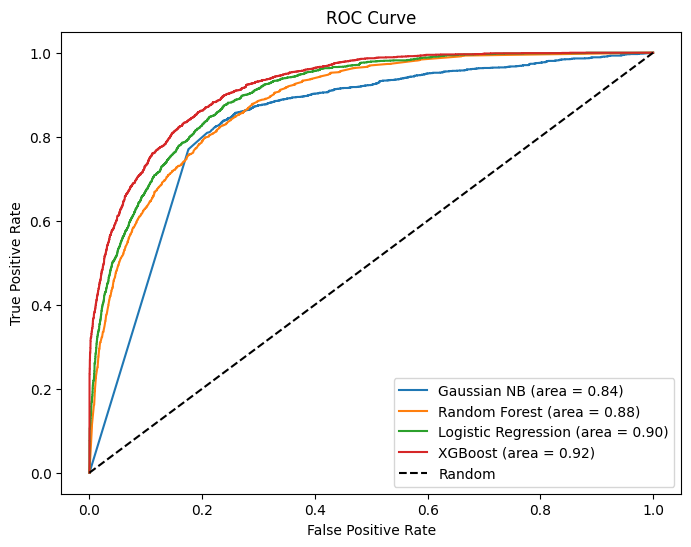

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 70% training split
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # the SMOTE technique is used to balance the data by oversampling the minority class

gnb = GaussianNB() # creating an instance of the Gaussian Naive Bayes model
rf = RandomForestClassifier(random_state=42) # creating an instance of the Random Forest model
lr = LogisticRegression(random_state=42) # creating an instance of the Logistic Regression model
xgb = XGBClassifier(random_state=42) # creating an instance of the XGBoost model

gnb.fit(x_train, y_train) # the Gaussian Naive Bayes model is trained
rf.fit(x_train, y_train) # the Random Forest model is trained
lr.fit(x_train, y_train) # the Logistic Regression model is trained
xgb.fit(x_train, y_train) # the XGBoost model is trained

prediction_gaussian = gnb.predict_proba(x_test)[:,1] # the Gaussian Naive Bayes model is used to predict the output
predictions_rf = rf.predict_proba(x_test)[:,1] # the Random Forest model is used to predict the output
predictions_lr = lr.predict_proba(x_test)[:,1] # the Logistic Regression model is used to predict the output
predictions_xgb = xgb.predict_proba(x_test)[:,1] # the XGBoost model is used to predict the output

# lets us check the scores now
gaussian_roc_auc = roc_auc_score(y_test, prediction_gaussian)
print(f"ROC AUC score of the Gaussian NB model is {gaussian_roc_auc}")

rf_roc_auc = roc_auc_score(y_test, predictions_rf)
print(f"ROC AUC score of the Random Forest model is {rf_roc_auc}")

lr_roc_auc = roc_auc_score(y_test, predictions_lr)
print(f"ROC AUC score of the Logistic Regression model is {lr_roc_auc}")

xgb_roc_auc = roc_auc_score(y_test, predictions_xgb)
print(f"ROC AUC score of the XGBoost model is {xgb_roc_auc}")

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, prediction_gaussian)
fpr_rf, tpr_rf, _ = roc_curve(y_test, predictions_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, predictions_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, predictions_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_gnb, tpr_gnb, label=f"Gaussian NB (area = {gaussian_roc_auc:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (area = {rf_roc_auc:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (area = {lr_roc_auc:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (area = {xgb_roc_auc:.2f})")

plt.plot([0,1],[0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')

#### Thus using the above plot we can rank the models based on best efficiency as below.
1. XGBoost classifier
2. Logistic Regression
3. Random Forest Classifier
4. Gaussian Naive Bayes